In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#data exploration

print(train.shape)

(17170, 29)


In [4]:
# check missing values
train.isnull().sum()

Danceability           0
Energy              2555
Key                 2602
Loudness            2569
Speechiness         2515
Acousticness        2577
Instrumentalness    2601
Liveness            2535
Valence             2574
Tempo               2562
Duration_ms         2603
Views               2596
Likes               2579
Stream              2568
Album_type          2560
Licensed            2593
official_video      2615
id                     0
Track               2562
Album               2585
Uri                 2564
Url_spotify         2591
Url_youtube         2529
Comments            2581
Description         2604
Title               2623
Channel             2558
Composer            2558
Artist              2566
dtype: int64

In [6]:
# grab numeric columns
numeric_cols = train.select_dtypes(include=[np.number])
numeric_cols.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'id', 'Comments'],
      dtype='object')

In [11]:
# normalize numeric columns
numeric_cols_norm = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()
numeric_cols_norm.describe()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,id,Comments
count,1.717000e+04,1.461500e+04,1.456800e+04,1.460100e+04,1.465500e+04,1.459300e+04,1.456900e+04,1.463500e+04,1.459600e+04,1.460800e+04,1.456700e+04,1.457400e+04,1.459100e+04,1.460200e+04,1.717000e+04,1.458900e+04
mean,1.407015e-16,4.910353e-17,-7.121035e-17,3.017167e-17,9.987841e-17,-4.382159e-18,4.291836e-17,1.675007e-17,-2.039719e-16,-4.027447e-16,-3.902205e-17,-2.047674e-17,7.791573e-18,7.785703e-18,-5.296999e-17,3.652800e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.604076e+00,-1.383862e+00,-1.513343e+00,-8.520174e+00,-9.262022e-01,-5.184296e-01,-2.870221e-01,-2.937631e-01,-2.147065e+00,-4.076754e+00,-1.583332e+00,-3.483113e-01,-3.756938e-01,-5.337183e-01,-1.731899e+00,-1.311444e-01
25%,-9.045260e-01,-8.308034e-01,-9.348039e-01,-2.408375e-01,-5.759473e-01,-5.179873e-01,-2.870221e-01,-2.865123e-01,-7.751432e-01,-8.055499e-01,-3.592203e-01,-3.404994e-01,-3.626498e-01,-4.664001e-01,-8.659497e-01,-1.286524e-01
50%,1.447991e-01,-1.665998e-01,-6.699580e-02,2.398996e-01,-4.275013e-01,-4.869742e-01,-2.870109e-01,-2.771905e-01,2.106158e-02,-3.176511e-02,-8.914017e-02,-2.917641e-01,-3.039037e-01,-3.455393e-01,0.000000e+00,-1.163468e-01
75%,8.443492e-01,7.022444e-01,8.008123e-01,5.816788e-01,1.022472e-01,-5.569442e-02,-2.849739e-01,-1.850756e-01,8.009339e-01,6.422480e-01,2.202002e-01,-8.665525e-02,-8.156320e-02,-1.403551e-02,8.659497e-01,-6.759094e-02
max,1.543899e+00,2.736748e+00,1.379351e+00,1.847715e+00,8.426865e+00,3.941961e+00,4.937858e+00,8.412272e+00,1.907454e+00,4.127195e+00,3.597261e+01,2.252802e+01,2.288269e+01,1.347356e+01,1.731899e+00,7.492123e+01


<AxesSubplot:>

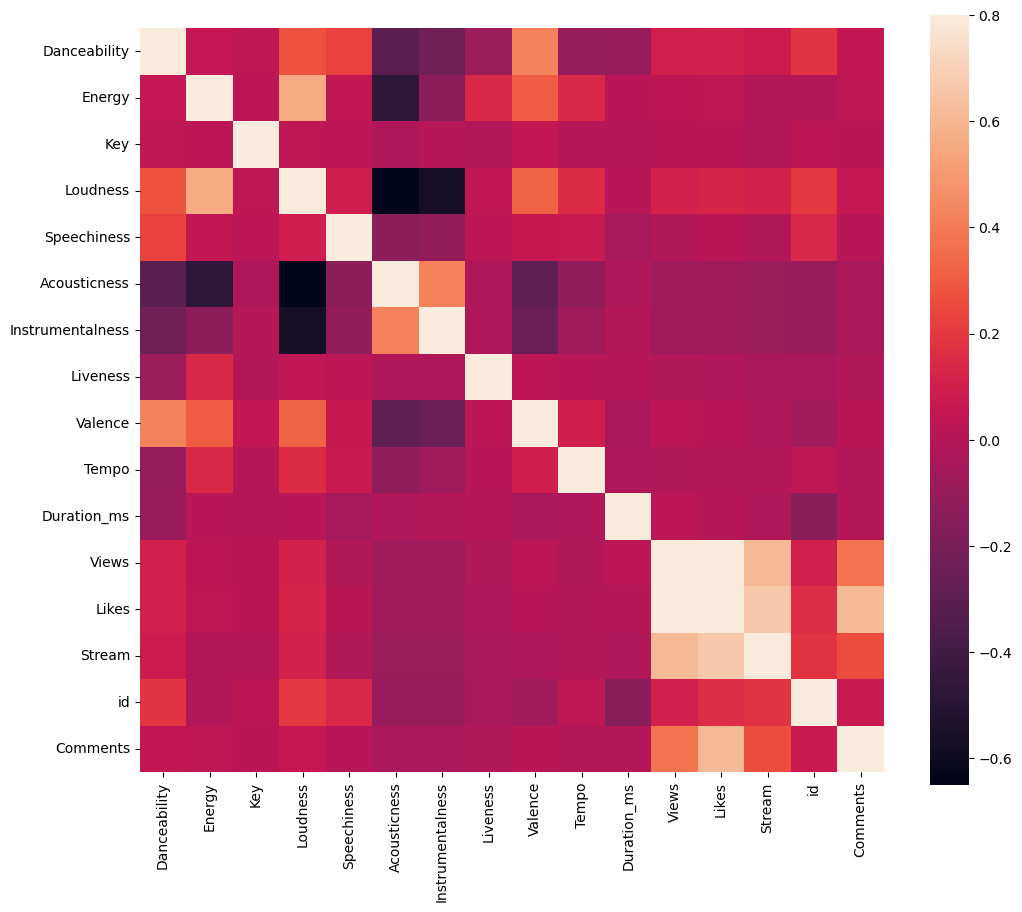

In [13]:
# check correlation
corr = numeric_cols_norm.corr()

# plot correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=0.8, square=True)



In [ ]:
#replace normalized numeric columns
train[numeric_cols_norm.columns] = numeric_cols_norm
